<a href="https://colab.research.google.com/github/Fontesx11/AR/blob/main/C%C3%B3pia_de_Projeto_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregar e preparar o Dataset

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho para o dataset no Google Drive
data_dir = "/content/drive/MyDrive/MyFoodDataset"

# Transformações para normalização e Data Augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.RandomHorizontalFlip(),  # Flip horizontal aleatório
        transforms.RandomRotation(10),      # Rotação aleatória
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) # Normalização
    ]),
    'val': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}

# Carregar as imagens
image_datasets = {
    x: datasets.ImageFolder(root=f"{data_dir}/{x}", transform=data_transforms[x])
    for x in ['train', 'val', 'test']
}

# Criar DataLoaders
dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=2)
    for x in ['train', 'val', 'test']
}

# Verificar as classes
class_names = image_datasets['train'].classes
print("Classes detectadas:", class_names)

# Testar carregamento de um batch
images, labels = next(iter(dataloaders['train']))
print("Tamanho do batch:", images.shape)


Mounted at /content/drive
Classes detectadas: ['apple', 'bean', 'boiled', 'chicken', 'fried', 'lunch', 'rice', 'salad', 'spaghetti', 'steak']
Tamanho do batch: torch.Size([32, 3, 299, 299])


# Mapear as Classes

In [3]:
class_mapping = {
    'apple': 'Maçã',
    'bean': 'Feijão',
    'boiled': 'Ovo Cozido',
    'chicken': 'Peito de Frango',
    'fried': 'Ovo Frito',
    'lunch': 'Almoço',
    'rice': 'Arroz',
    'salad': 'Salada',
    'spaghetti': 'Macarrão',
    'steak': 'Carne Assada'
}

# Criar a lista de classes traduzidas
filtered_class_names = [class_mapping[cls] for cls in class_names]
print("Classes finais mapeadas:", filtered_class_names)


Classes finais mapeadas: ['Maçã', 'Feijão', 'Ovo Cozido', 'Peito de Frango', 'Ovo Frito', 'Almoço', 'Arroz', 'Salada', 'Macarrão', 'Carne Assada']


Verificar se os dados estão sendo carregados corretamente e se o mapeamento das classes está funcionando.

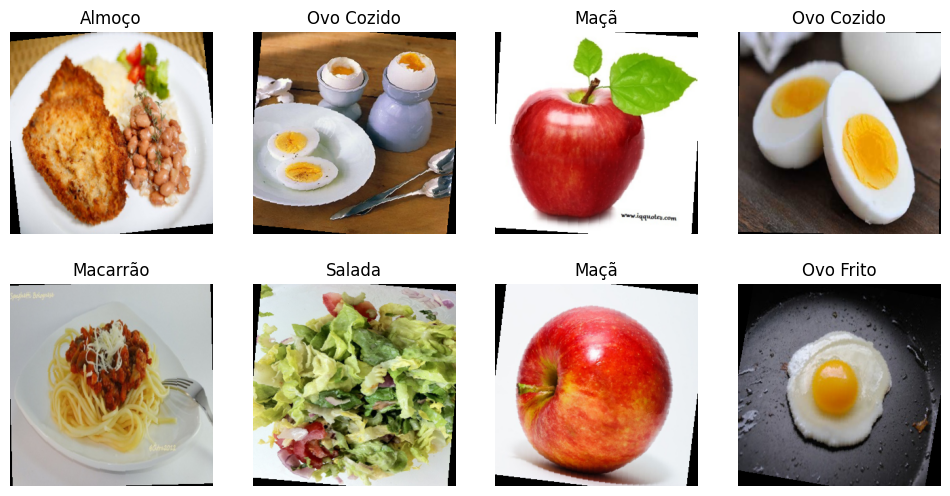

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Função para mostrar um batch de imagens
def imshow(inp, title=None):
    """Imprime uma imagem do tensor"""
    inp = inp.numpy().transpose((1, 2, 0))  # Ajusta para formato correto (Altura, Largura, Canais)
    mean = np.array([0.5, 0.5, 0.5])  # Valores usados na normalização
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean  # Desfaz a normalização
    inp = np.clip(inp, 0, 1)  # Garante que os valores estão no intervalo [0,1]
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis("off")

# Pegar um batch do dataloader de treino
inputs, labels = next(iter(dataloaders['train']))

# Criar grid com algumas imagens
fig = plt.figure(figsize=(12, 6))
for i in range(8):  # Exibir 8 imagens
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    imshow(inputs[i])
    ax.set_title(filtered_class_names[labels[i].item()])  # Nome traduzido da classe

plt.show()




```
# Isto está formatado como código
```

# Carregar o modelo Inception pré-treinado

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Definir o dispositivo (GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Carregar o modelo Inception v3 pré-treinado
model_inception = models.inception_v3(pretrained=True)

# Modificar a última camada para 10 classes
num_classes = 10
model_inception.fc = nn.Linear(model_inception.fc.in_features, num_classes)

# Enviar o modelo para o dispositivo escolhido
model_inception = model_inception.to(device)

# Definir função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_inception.parameters(), lr=0.0001)

# Mostrar a estrutura do modelo modificado
print(model_inception)


Usando dispositivo: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 87.7MB/s]


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

# Função de Treino Inception



In [18]:
def train_model_inception(model, dataloaders, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        print(f"\n🔹 Época {epoch+1}/{num_epochs}")

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Modo de treino
            else:
                model.eval()  # Modo de validação

            running_loss = 0.0
            correct = 0
            total = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    # Check if the model is in training mode to decide how to handle outputs.
                    if phase == "train":
                        # In training mode, expect both outputs and auxiliary outputs.
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4 * loss2
                    else:
                        # In validation mode, only get the primary output.
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                correct += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / total
            epoch_acc = correct.double() / total

            print(f"{phase} | Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")

    return model

Inspecionar os rótulos carregados no DataLoader

In [19]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.RandomHorizontalFlip(),  # Flip horizontal aleatório
        transforms.RandomRotation(10),      # Rotação aleatória
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) # Normalização
    ]),
    'val': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize((299, 299)),  # Redimensionar para 299x299
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}

In [20]:
# Testar um batch para ver os rótulos
images, labels = next(iter(dataloaders["train"]))
print("Tamanho do batch:", images.shape)
print("Rótulos encontrados:", labels)
print("Número total de classes detectadas:", len(class_names))

Tamanho do batch: torch.Size([32, 3, 299, 299])
Rótulos encontrados: tensor([3, 4, 1, 9, 7, 5, 8, 0, 4, 0, 1, 2, 3, 4, 5, 4, 1, 5, 8, 6, 9, 5, 0, 3,
        6, 4, 8, 5, 1, 7, 3, 5])
Número total de classes detectadas: 10


# Executar o Treinamento Inception

---



In [21]:
model_inception_const = train_model_inception(model_inception, dataloaders, criterion, optimizer, num_epochs=5)


🔹 Época 1/5
train | Loss: 0.1471 | Acc: 0.9747
val | Loss: 0.1264 | Acc: 0.9640

🔹 Época 2/5
train | Loss: 0.0863 | Acc: 0.9907
val | Loss: 0.0932 | Acc: 0.9840

🔹 Época 3/5
train | Loss: 0.0644 | Acc: 0.9893
val | Loss: 0.1126 | Acc: 0.9520

🔹 Época 4/5
train | Loss: 0.0391 | Acc: 0.9960
val | Loss: 0.1190 | Acc: 0.9680

🔹 Época 5/5
train | Loss: 0.0218 | Acc: 1.0000
val | Loss: 0.0795 | Acc: 0.9680
